<h3>Домашнее задание №1</h3><br/>
<h4>Емельянов Виталий, 293 гр.</h4>

1)  Построить доверительный интервал для третьего момента нормального распределения с параметрами a и $\sigma^2$.|

2) Построить асимптотический доверительный интервал для параметра $\theta$ в модели Pareto($\theta$).





3) Построить оценку параметра $\theta $ в модели $U(-\theta,\theta) $ методом максимального правдоподобия. 

Решение:
$$f(\theta, y) = \frac{1}{2\theta}I\{x_i \in [ -\theta, \theta]\}$$
Функция правдоподобия $F(\theta, \vec y) = \frac{1}{(2\theta)^n} \prod_{i=1}^{n} I\{x_i \in [ -\theta, \theta]\} =   \frac{1}{(2\theta)^n} \prod_{i=1}^{n} I\{-\theta < x_{(1)} < \dots < x_{(n)} < \theta\}$

Функция правдоподобия убывает по n, причем $\theta > -x_{(1)}$ и $x_{(n)} < \theta$. 
Значит $$\hat{\theta} = max\{-x_{(1)}, x_{(n)}\}$$

4) Найти оценку параметра $\frac{1}{\theta}$ в модели $U(0,\theta)$ методом моментов.


Решение:

$$E_{\theta} X_1 = \theta / 2$$
$$\implies \frac{1}{\theta} = \frac{1}{2E_{\theta} X_1}$$
$$\implies \frac{1}{\theta} = \frac{1}{2E_{\theta} X_1}$$
$$\implies \hat{(\frac{1}{\theta})} = \frac{1}{\frac{2}{n}\sum_{i=1}^{n} X_i}$$


In [10]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

5) Сгенерировать выборки из экспоненциального распределения объемом 562 наблюдений, построить гистограмму получившегося распределения и наложить её на теоретическую плотность распределения

In [11]:
data  = np.random.exponential(1, 562)

xs = [x*0.01 for x in xrange(0, 700)]
theoretical = [np.exp(-x) for x in xs]

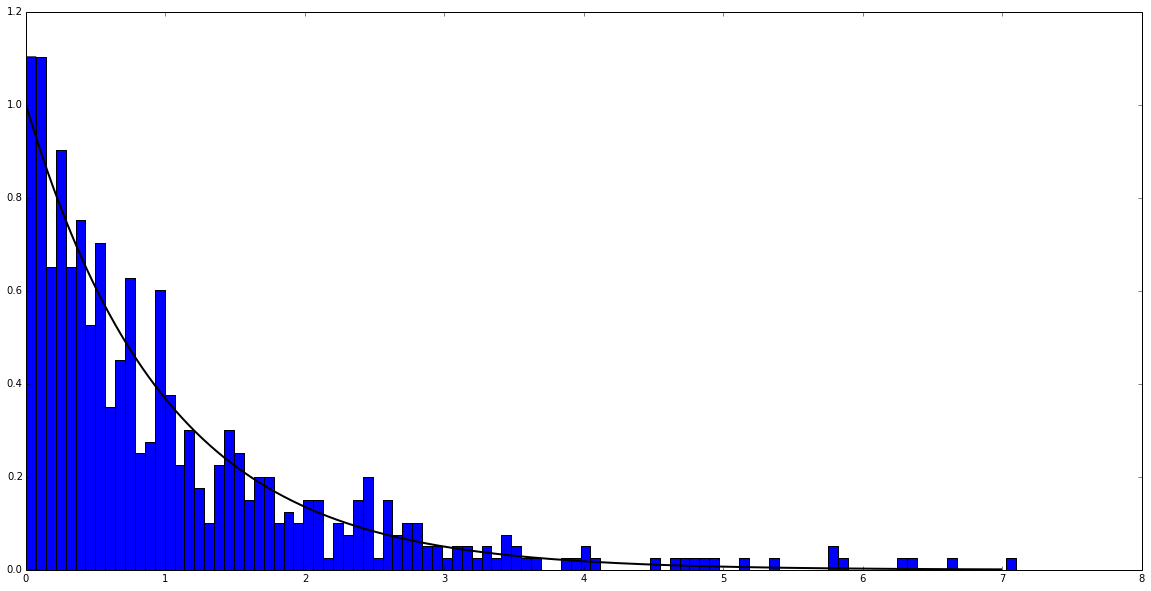

In [12]:
plt.figure(figsize=(20,10))
plt.hist(data, bins = 100, normed=True);
plt.plot(xs, theoretical, linewidth=2, color='k');

6) Сгенерировать выборку из нормального распределения с параметрами 15 и 2 объемом 100, 1000 и 10000, изобразить на графике доверительные интервалы для математического ожидания, получающиеся для данной выборки с уровнем доверия 99, проверить попадание истинного среднего в доверительный интервал.

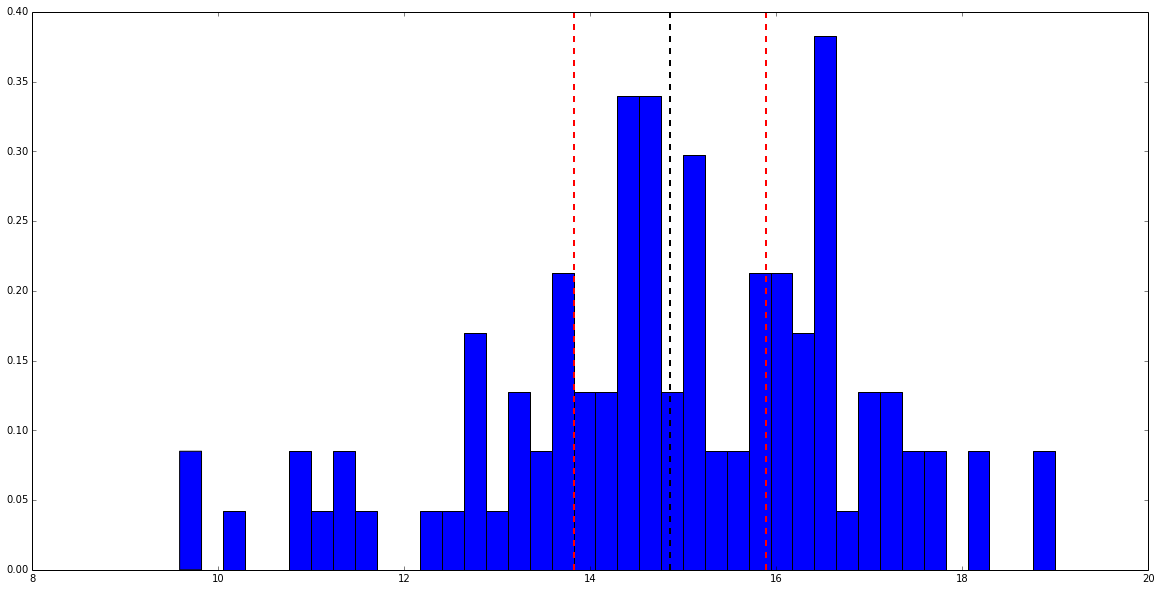

In [13]:
from scipy import stats

plt.figure(figsize=(20,10))
X100 = np.random.normal(15, 2, 100)
mean = X100.mean()
gamma = 0.01
sigma = 2.
quantile = stats.norm.ppf( sigma * gamma/2, 15, 2) 
lower = mean - quantile / np.sqrt(100)
upper = mean + quantile / np.sqrt(100)
plt.hist(X100, bins = 40, normed=True);
plt.axvline(mean, color='k', linestyle='dashed', linewidth=2);
plt.axvline(lower, color='r', linestyle='dashed', linewidth=2);
plt.axvline(upper, color='r', linestyle='dashed', linewidth=2);

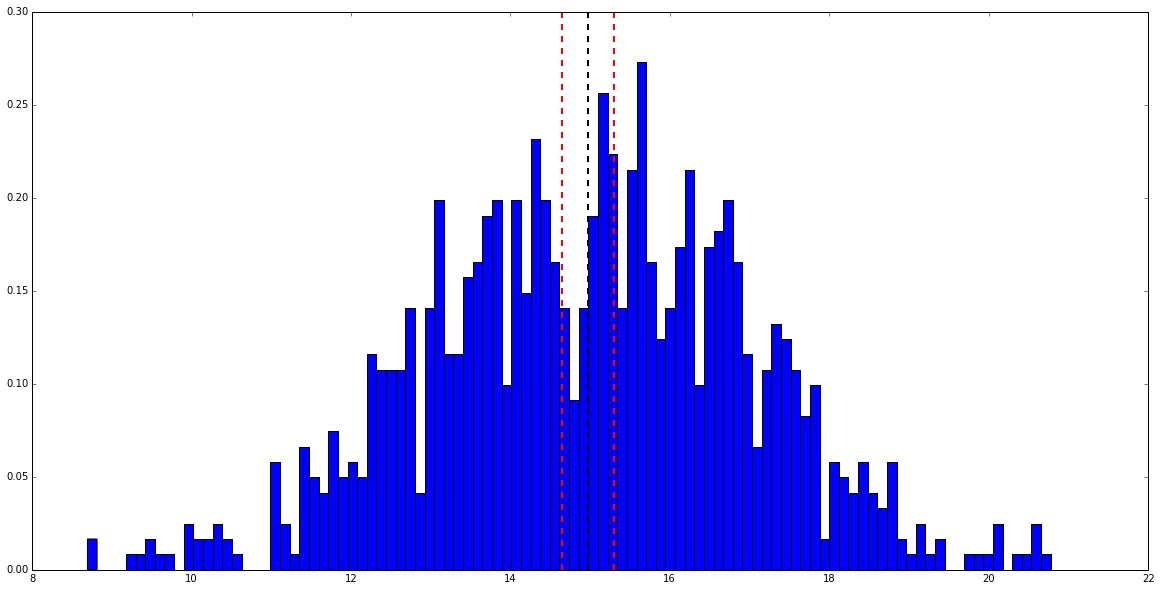

In [14]:
plt.figure(figsize=(20,10))
X1000 = np.random.normal(15, 2, 1000)
mean = X1000.mean()
sigma = 2.
quantile = scipy.stats.norm.ppf( sigma * gamma/2, 15, 2) 
lower = mean - quantile / np.sqrt(1000)
upper = mean + quantile / np.sqrt(1000)
plt.hist(X1000, bins = 100, normed=True);
plt.axvline(mean, color='k', linestyle='dashed', linewidth=2);
plt.axvline(lower, color='r', linestyle='dashed', linewidth=2);
plt.axvline(upper, color='r', linestyle='dashed', linewidth=2);

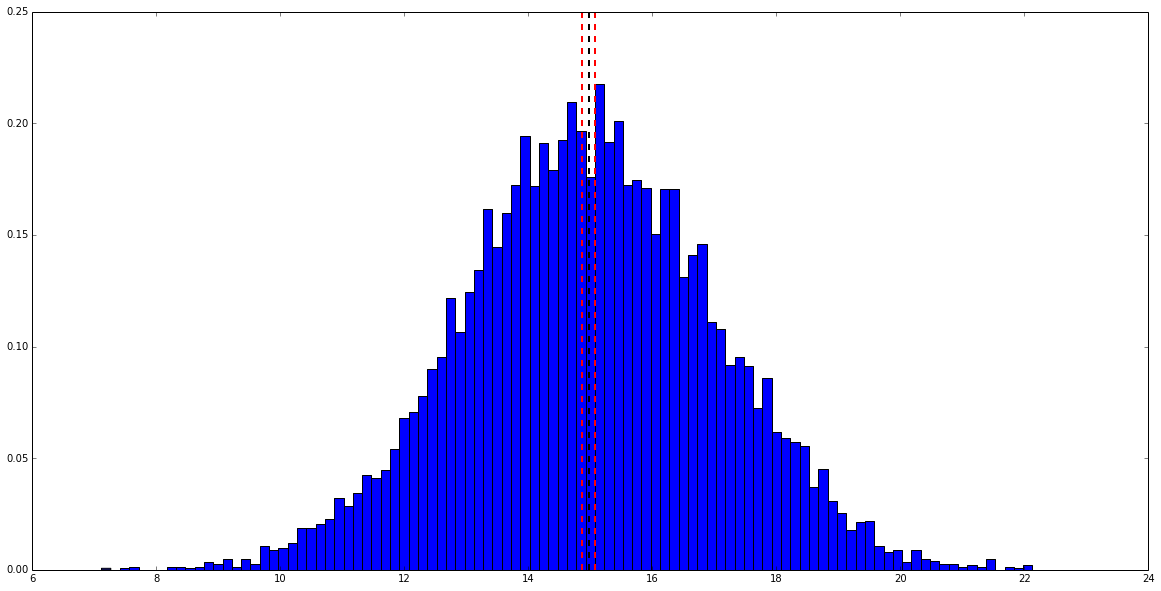

In [15]:
plt.figure(figsize=(20,10))
X10000 = np.random.normal(15, 2, 10000)
mean = X10000.mean()
sigma = 2.
quantile = scipy.stats.norm.ppf( sigma  * gamma/2, 15, 2) 
lower = mean - quantile / np.sqrt(10000)
upper = mean + quantile / np.sqrt(10000)
plt.hist(X10000, bins = 100, normed=True);
plt.axvline(mean, color='k', linestyle='dashed', linewidth=2);
plt.axvline(lower, color='r', linestyle='dashed', linewidth=2);
plt.axvline(upper, color='r', linestyle='dashed', linewidth=2);

7) Сгенерировать то же самое для гамма распределения с параметрами 2 и 4, доверительный интервал построить для параметра масштаба.

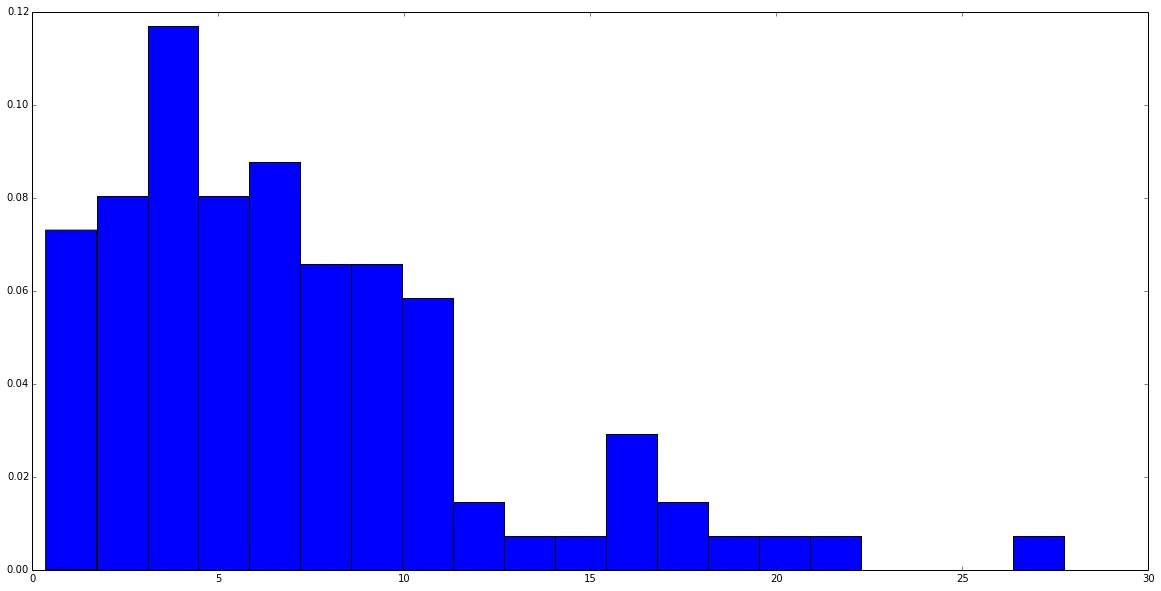

In [19]:
plt.figure(figsize=(20,10))
X100 = np.random.gamma(2, 4, 100)
plt.hist(X100, bins = 20, normed=True);

8) Сгенерировать выборку из смеси в отношении 0.70 к 0.30 гауссовских распределений N(0,1) и N(1,4). Построить эмпирическую функцию распределения и гистограмму, наложить на них теоретические функции.

Построим гистограмму и теоритическую функцию плотности распределения

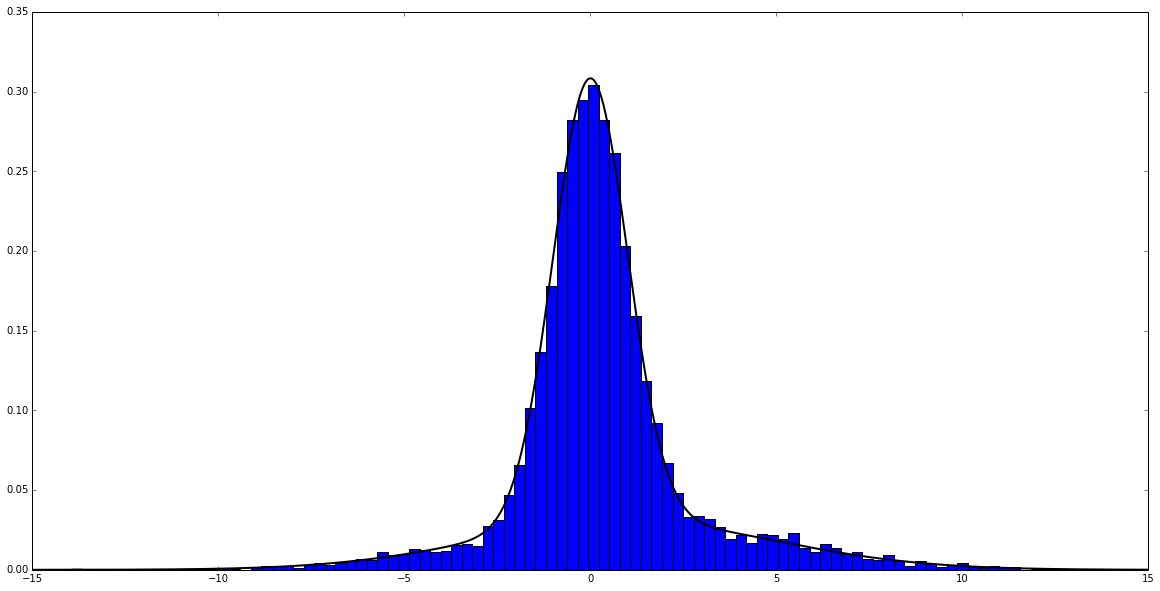

In [17]:
plt.figure(figsize=(20,10))
X1 = np.random.normal(0, 1, 7000)
X2 = np.random.normal(1, 4, 3000)
X = np.concatenate((X1, X2))
plt.hist(X, bins=100, normed=True);

(mu1, sigma1) = (0., 1.)
(mu2, sigma2) = (1., 4.)

xs = [x * 0.01 for x in xrange(-1500, 1500)]
ys = [0.7 * 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu1)**2 / (2 * sigma1**2) ) +
      0.3 * 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu2)**2 / (2 * sigma2**2) ) for x in xs]
plt.plot(xs, ys, linewidth=2, color='k');


Построим эмпирическую функцию распределения наложим на нее теоретическую функцию распределения

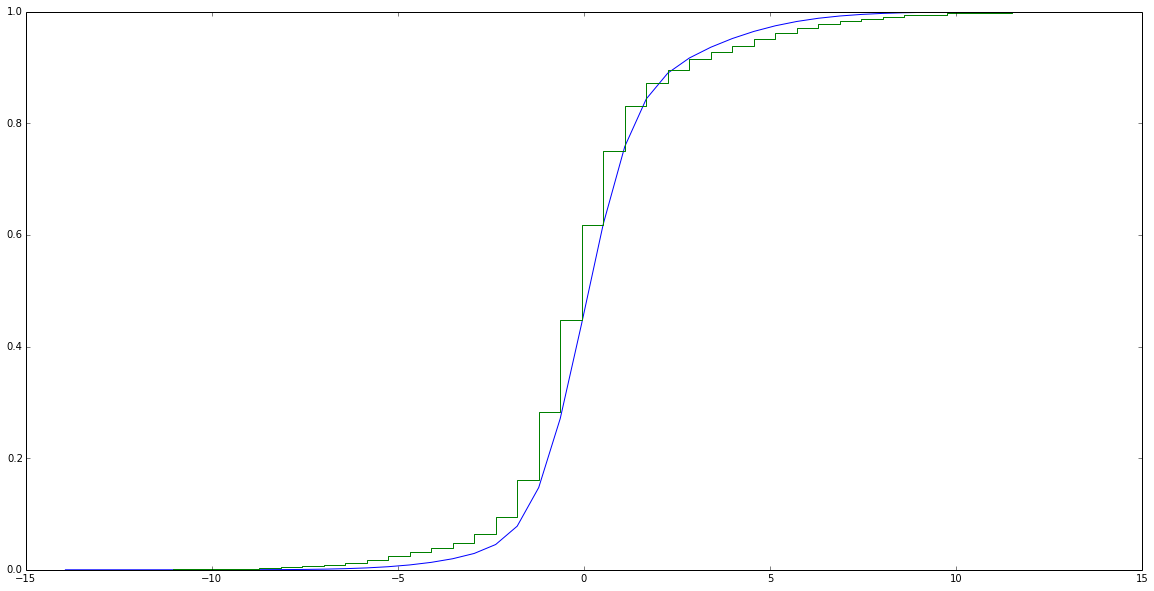

In [18]:
import statsmodels.api as sm
from scipy.stats import norm

ecdf = sm.distributions.ECDF(X)


x = np.linspace(min(X), max(X))
ye = ecdf(x)
y = 0.7 * norm.cdf(x, 0, 1) + 0.3 * norm.cdf(x, 1, 3)

plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.step(x, ye);